# F1 2023 Qualifying Notebook

## Notebook Setup

In [183]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display_html
from itertools import chain,cycle

q1df = pd.read_csv('data/bahrain_myteam_q1.csv', sep='\t')
q2df = pd.read_csv('data/bahrain_myteam_q2.csv', sep='\t')
q3df = pd.read_csv('data/bahrain_myteam_q3.csv', sep='\t')

# add source column
q1df['session'] = 'Q1'
q2df['session'] = 'Q2'
q3df['session'] = 'Q3'

# get max binIndex
maxBinIndex = q1df['binIndex'].max()
q1ValidLaps = q1df[q1df['binIndex'] == maxBinIndex][q1df['lap_time_invalid'] > -1].reset_index(drop=True)
q2ValidLaps = q2df[q2df['binIndex'] == maxBinIndex][q2df['lap_time_invalid'] > -1].reset_index(drop=True)
q3ValidLaps = q3df[q3df['binIndex'] == maxBinIndex][q3df['lap_time_invalid'] > -1].reset_index(drop=True)
sector1Bin = maxBinIndex / 3
sector2Bin = sector1Bin * 2

# camber map
frontCamberMap = {
    -0.0436332: -2.5, 
    -0.0523599: -3.0
}

rearCamberMap = {
    -0.0261799: -1.5,
    -0.0174533: -1.0,
}

# toe map
frontToeMap = {
    0.000872665: 0.05,
    0: 0
}

rearToeMap = {
    0.00436332: 0.25,
    0.00174533: 0.1
}

# Tyre Pressure Map
tyrePressureMap = {
    156511: 22.7,
    139964: 20.3,
    151685: 22.0,
    137895: 20.0,
}

# Visual Compound map
visualCompoundMap = {
    16: 'Soft',
    17: 'Medium',
    18: 'Hard',
    7: 'Intermediate',
    8: 'Wet',
}

# Actual Compound Map
actualCompoundMap = {
    16: 'C5',
    17: 'C4',
    18: 'C3',
    19: 'C2',
    20: 'C1',
    21: 'C0',
    7: 'inter',
    8: 'wet',
}


# Setup Headers
setupHeaders = [
    'lapNum',
    'Front Wing Setup', 
    'Rear Wing Setup', 
    'On Throttle Differential', 
    'Off Throttle Differential', 
    'Front Camber', 
    'Rear Camber', 
    'Front Toe', 
    'Rear Toe',
    'Front Suspension',
    'Rear Suspension',
    'Front Anti-Roll Bar',
    'Rear Anti-Roll Bar',
    'Front Ride Height',
    'Rear Ride Height',
    'Brake Pressure',
    'Brake Bias',
    'Front Left Tyre Pressure',
    'Front Right Tyre Pressure',
    'Rear Left Tyre Pressure',
    'Rear Right Tyre Pressure',
]

setupColumnRename = {
    'wing_setup_0': 'Front Wing Setup', 
    'wing_setup_1': 'Rear Wing Setup', 
    'susp_spring_setup_0': 'Front Suspension',
    'susp_spring_setup_2': 'Rear Suspension',
    'arb_setup_0': 'Front Anti-Roll Bar',
    'arb_setup_1': 'Rear Anti-Roll Bar',
    'susp_height_setup_0': 'Front Ride Height',
    'susp_height_setup_2': 'Rear Ride Height',
}

def highlight_min(x):
   min_val = x.min()
   return ['background-color: purple' if val == min_val else '' for val in x]

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def applySectorLines(plot):
    plot.axvline(x=sector1Bin, color='r', linestyle='--')
    plot.axvline(x=sector2Bin, color='r', linestyle='--')

/var/folders/7v/5sz92nkn6s13fvy6c8bz7_sm0000gn/T/ipykernel_36014/437662906.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q1ValidLaps = q1df[q1df['binIndex'] == maxBinIndex][q1df['lap_time_invalid'] > -1].reset_index(drop=True)
/var/folders/7v/5sz92nkn6s13fvy6c8bz7_sm0000gn/T/ipykernel_36014/437662906.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q2ValidLaps = q2df[q2df['binIndex'] == maxBinIndex][q2df['lap_time_invalid'] > -1].reset_index(drop=True)
/var/folders/7v/5sz92nkn6s13fvy6c8bz7_sm0000gn/T/ipykernel_36014/437662906.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q3ValidLaps = q3df[q3df['binIndex'] == maxBinIndex][q3df['lap_time_invalid'] > -1].reset_index(drop=True)


## Qualifying Summary

A table of all the fast laps we set

In [184]:
summary_headers = ['lapNum', 'lap_time', 'race_position']

print(q1ValidLaps)

q1lapSummary = q1ValidLaps[summary_headers]
q2lapSummary = q2ValidLaps[summary_headers]
q3lapSummary = q3ValidLaps[summary_headers]

combined_laps = pd.concat([q1ValidLaps, q2ValidLaps, q3ValidLaps], ignore_index=True)
combined_laps_summary = combined_laps[summary_headers]

q1_styler = q1lapSummary.style.set_table_attributes("style='display:inline'").set_caption('Q1').apply(highlight_min, axis=0, subset=['lap_time'])
q2_styler = q2lapSummary.style.set_table_attributes("style='display:inline'").set_caption('Q2').apply(highlight_min, axis=0, subset=['lap_time'])
q3_styler = q3lapSummary.style.set_table_attributes("style='display:inline'").set_caption('Q3').apply(highlight_min, axis=0, subset=['lap_time'])
combined_laps_styler = combined_laps_summary.style.set_table_attributes("style='display:inline'").set_caption('Combined Laps').apply(highlight_min, axis=0, subset=['lap_time'])

display_html(q1_styler._repr_html_()+q2_styler._repr_html_()+q3_styler._repr_html_()+combined_laps_styler._repr_html_(), raw=True)



     carId  trackId  trackLength  lapIndex  lapNum  lapFlag  binIndex  \
0  My Team  Bahrain         5408         0       0        0      5407   
1  My Team  Bahrain         5408         1       1        0      5407   
2  My Team  Bahrain         5408         2       2        0      5407   

   validBin  lap_number  lap_distance  ...  engine_damage  mguh_damage  \
0         1           0        5408.0  ...           0.11          0.1   
1         1           1        5408.0  ...           0.12          0.1   
2         1           2        5408.0  ...           0.12          0.1   

   es_damage  ce_damage  ice_damage  mguk_damage  tc_damage  engine_blown  \
0       0.04       0.02        0.12         0.05       0.08             0   
1       0.04       0.02        0.12         0.05       0.08             0   
2       0.05       0.02        0.13         0.05       0.09             0   

   engine_seized  session  
0              0       Q1  
1              0       Q1  
2              0 

,lapNum,lap_time,race_position
0,0,95.180000,15
1,1,94.726000,9
2,2,92.779000,14
,lapNum,lap_time,race_position
0,0,94.072000,12
1,1,93.209000,9
2,2,93.065000,6
,lapNum,lap_time,race_position
0,0,93.403000,9
1,1,93.655000,7


## Summary Statistics

In [185]:
combined_laps['lap_time'].describe()

count     8.000000
mean     93.761125
std       0.839588
min      92.779000
25%      93.173000
50%      93.529000
75%      94.235500
max      95.180000
Name: lap_time, dtype: float64

## Boxplot

<AxesSubplot: title={'center': 'Box Plot of Lap Times'}>

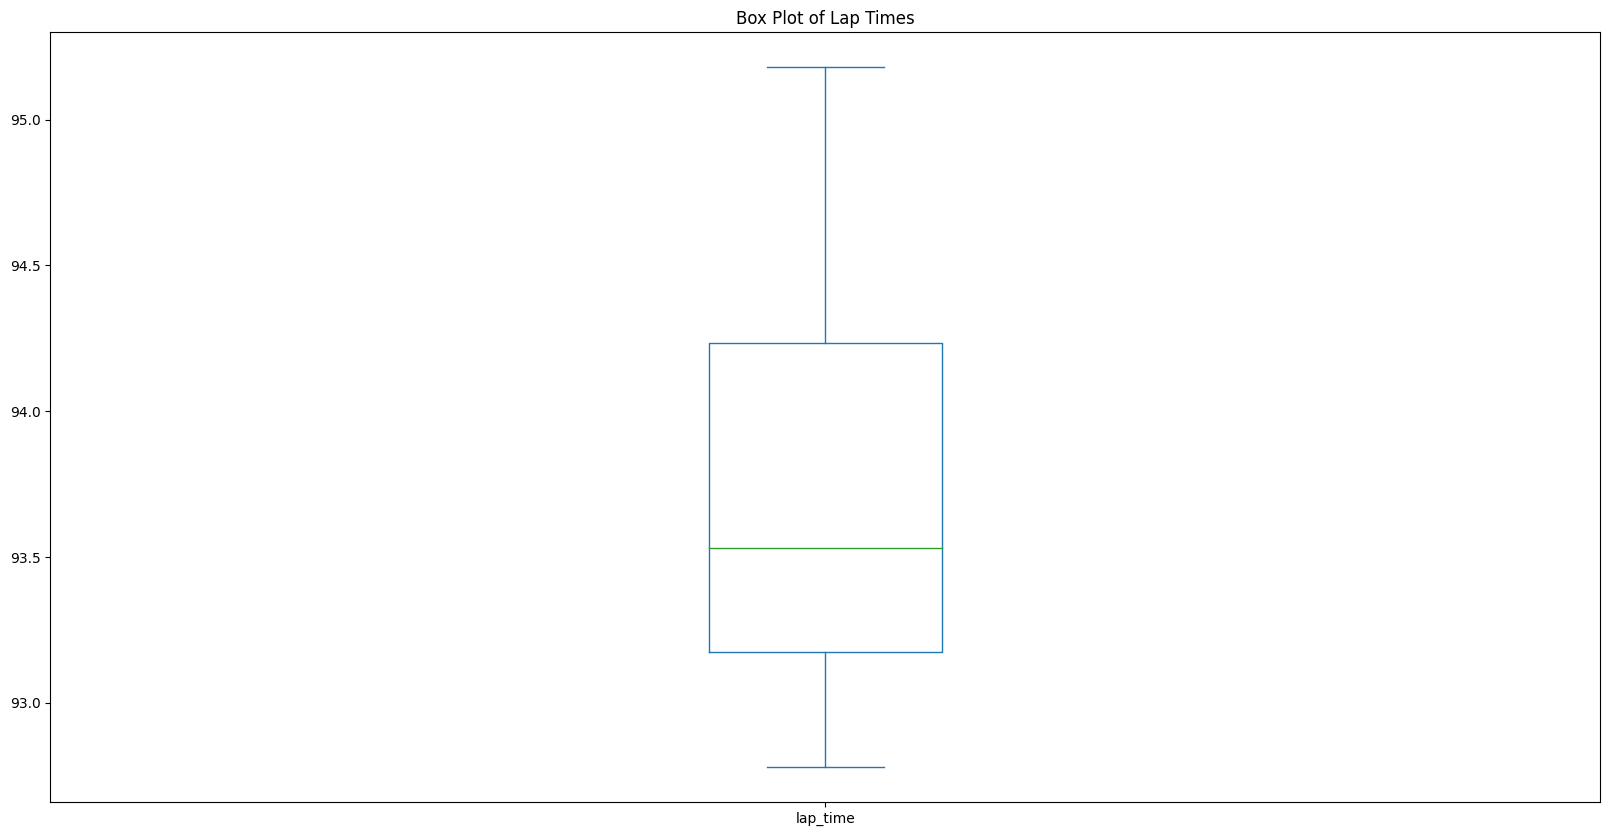

In [186]:
combined_laps['lap_time'].plot.box(figsize=(20, 10), title='Box Plot of Lap Times')

## Fastest Lap Time Analysis

Tyre Compound: Hard C3


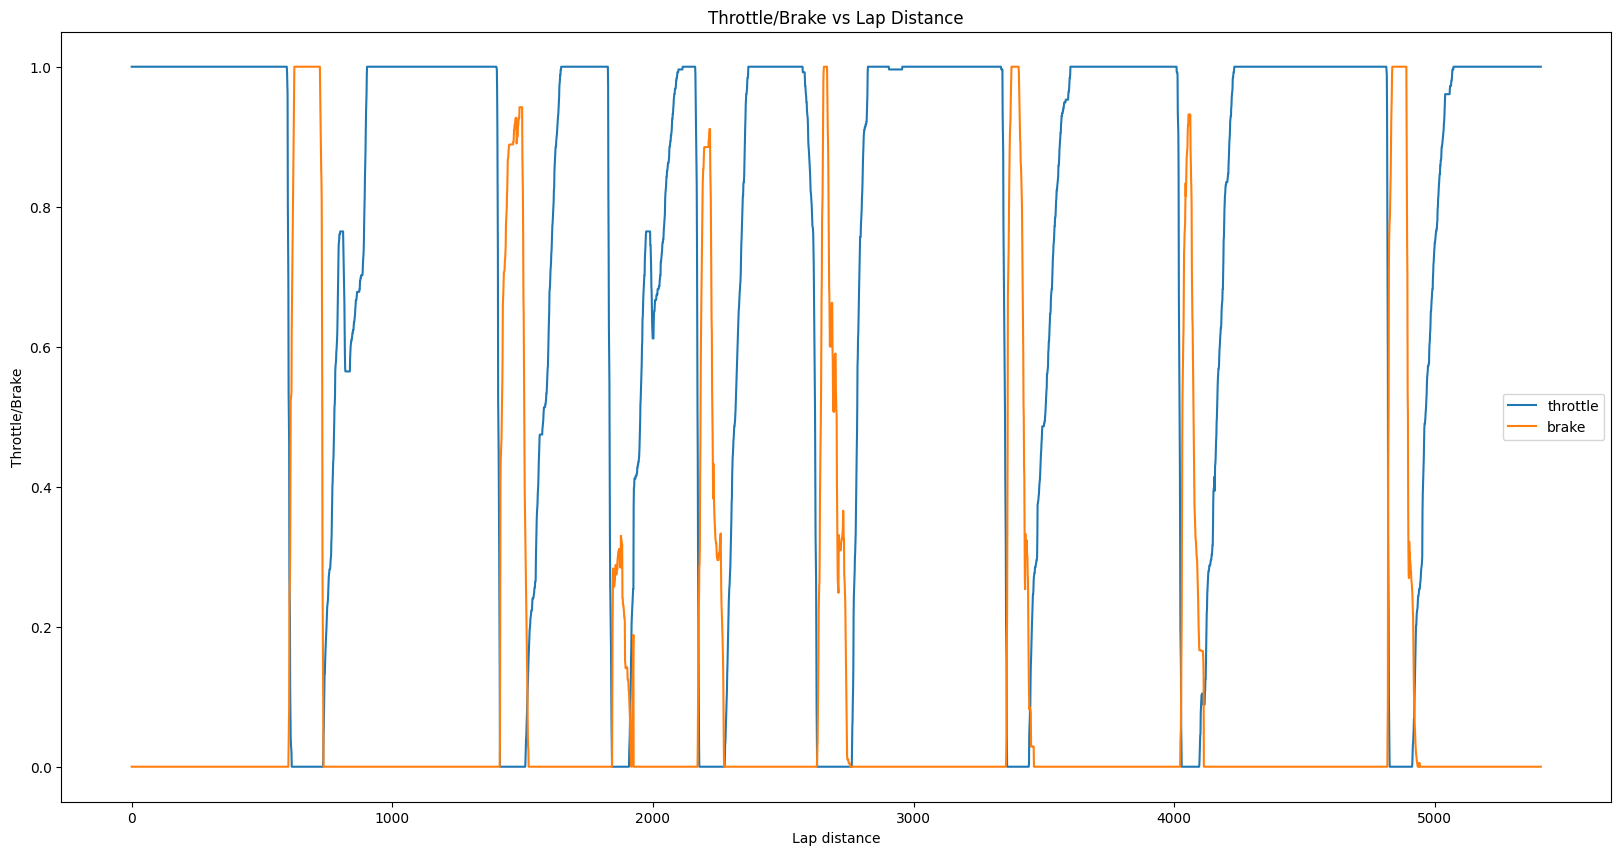

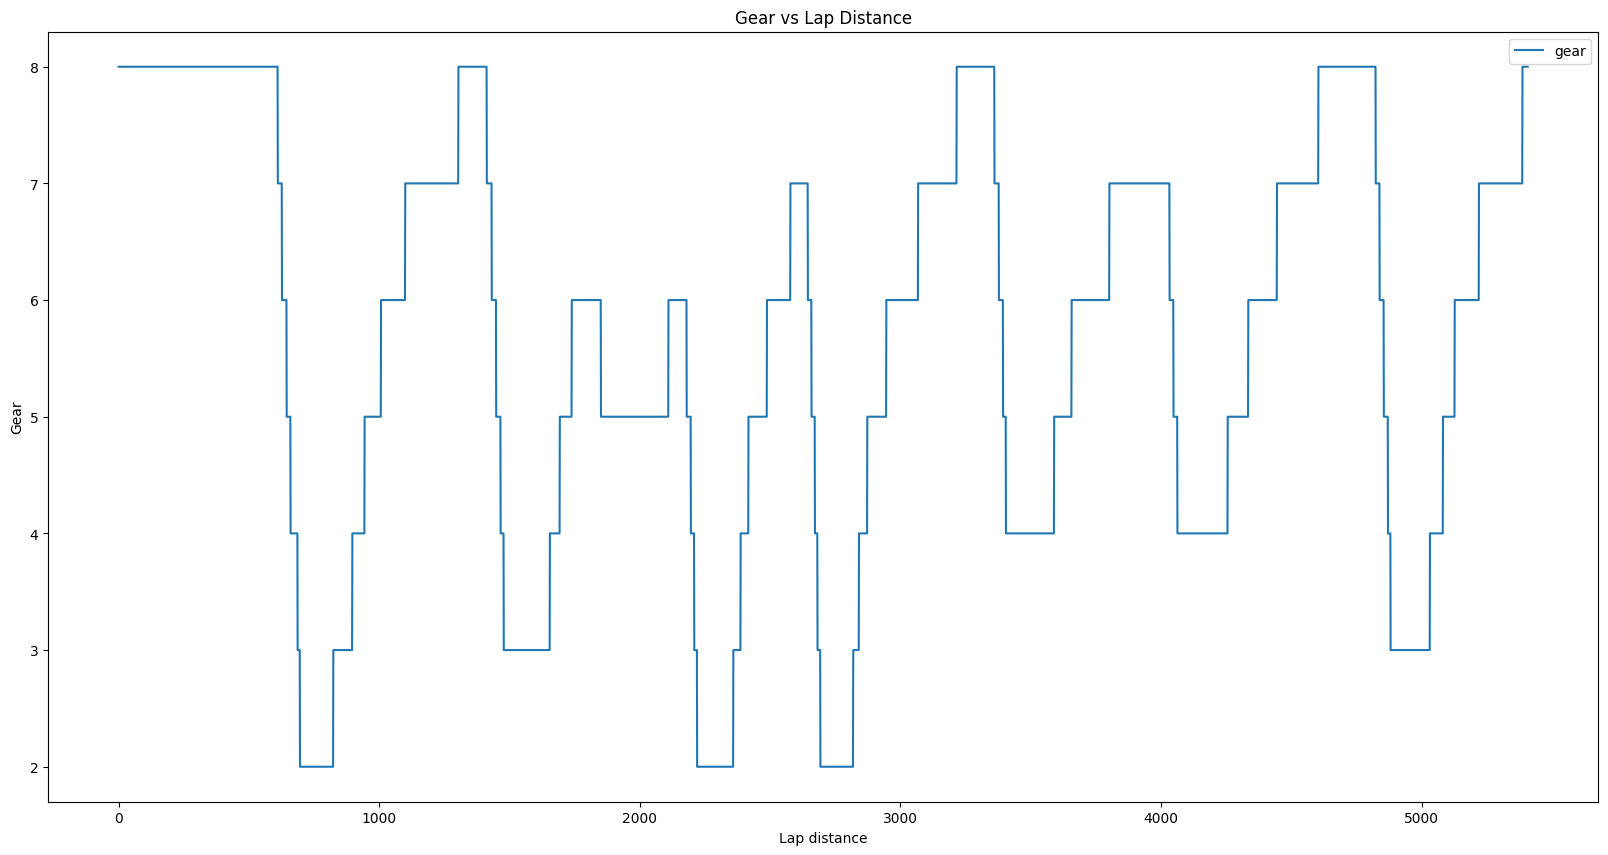

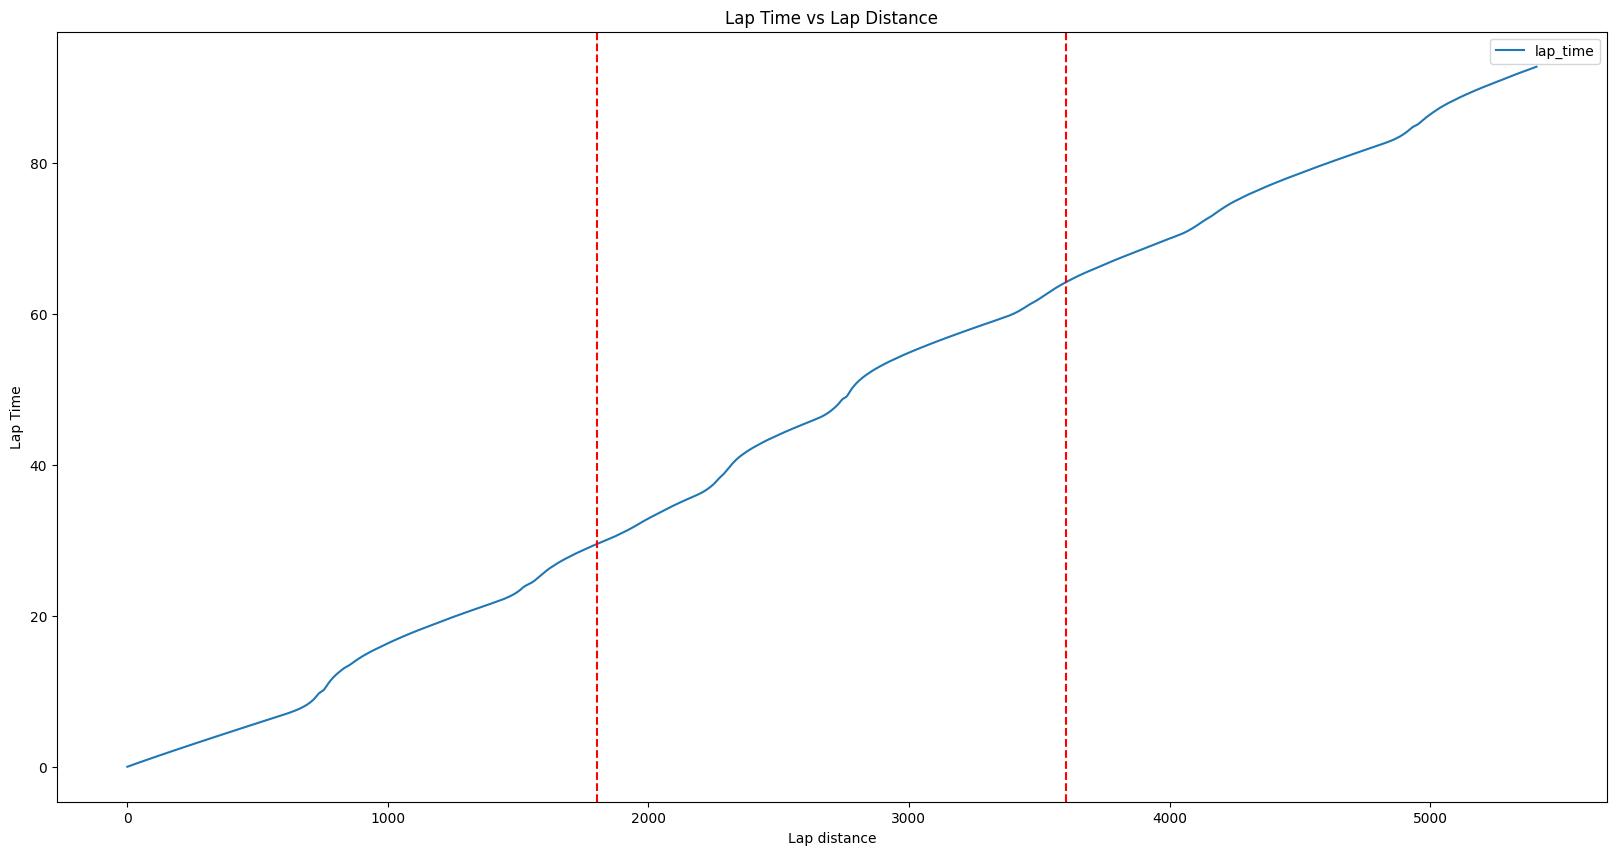

In [188]:
combined_data = pd.concat([q1df, q2df, q3df], ignore_index=True)

fastestLap = combined_laps[combined_laps['lap_time'] == combined_laps['lap_time'].min()][['lapNum', 'session']].reset_index(drop=True)
lap_data = combined_data.loc[(combined_data['session'] == fastestLap['session'].values[0]) & (combined_data['lapNum'] == fastestLap['lapNum'].values[0])]

throttle_break = lap_data[['throttle', 'brake']].reset_index(drop=True)
gear_data = lap_data[['gear']].reset_index(drop=True)
lap_distance_time = lap_data[['lap_distance', 'lap_time']].reset_index(drop=True)

compound = lap_data['tyre_compound_0'].unique()[0]

print("Tyre Compound:", visualCompoundMap[compound], actualCompoundMap[compound])

throttle_break.plot(xlabel="Lap distance", ylabel="Throttle/Brake", title="Throttle/Brake vs Lap Distance", figsize=(20,10))
gear_data.plot(xlabel="Lap distance", ylabel="Gear", title="Gear vs Lap Distance", figsize=(20,10))
applySectorLines(lap_distance_time.plot(xlabel="Lap distance", ylabel="Lap Time", title="Lap Time vs Lap Distance", figsize=(20,10), x="lap_distance", y="lap_time"))

plt.show()